In [ ]:
import networkx as nx
import numpy as np
import random as random
import matplotlib.pyplot as plt 
import pandas as pd

# Utilities

In [ ]:

def check_mean_error(mean,error,k):
    return True if k - error < mean < k + error else False

def make_graphs(nodes_counts,k,gamma,err_seq,err_graph):
  graphs = {}
  for nodes_count in nodes_counts:
    is_acceptable_seq = False
    graph_degree_seq = np.zeros(nodes_count)
    seq = np.zeros(nodes_count)
    while(not is_acceptable_seq):
      seq = np.rint((np.random.default_rng().pareto(gamma-1, nodes_count) + 1))
      # print(seq.mean())
      is_mean_k = check_mean_error(seq.mean(),err_seq,k)
      is_graph = True if nx.is_graphical(seq) else Fal
      is_acceptable_seq = True if is_graph and is_mean_k else False
    seq = seq.astype(np.int64)
    is_acceptable_graph = False
    while (not is_acceptable_graph):
      G = nx.expected_degree_graph(seq)
      # G = nx.Graph(G)
      # G.remove_edges_from(nx.selfloop_edges(G))
      for i in range(0,len(G.nodes)):
        graph_degree_seq[i] = G.degree[i]
      is_acceptable_graph = check_mean_error(graph_degree_seq.mean(),err_graph,k)
      # print(is_acceptable_graph, graph_degree_seq.mean())
    graphs[nodes_count] = G
    print(nodes_count, seq.mean() , graph_degree_seq.mean())
  print(graphs)
  return graphs

In [ ]:
def make_connected(G_):
    if nx.is_connected(G_):
        return G_
    else:
        Gcc = sorted(nx.connected_components(G_), key=len, reverse=True)
        G0 = G_.subgraph(Gcc[0])
        return G0


In [ ]:
def find_avg_d(G_):
    d = nx.average_shortest_path_length(G_)
    print(d)
    return d


In [ ]:
def find_avg_d_2(G_,samples=1000):
    nodes = G_.nodes()
    avg = 0
    d = np.zeros(samples)
    for i in range(samples):
        n1, n2 = random.choices(list(nodes), k=2)
        length = nx.shortest_path_length(G_, source=n1, target=n2)
        d[i] = length
    print(d.mean())
    return d.mean()


In [ ]:
def get_graph_nodes(G_):
  return  [val for (node, val) in G_.degree()]


In [ ]:
def compare_connected(graphs):
  for nodes,graph in graphs.items():

      print(f"{nodes}: {graph}, k = { np.array(get_graph_nodes(graph)).mean() }")
      graphs = { node_count: make_connected(G) for (node_count,G) in graphs.items()}
  print("================")
  for nodes,graph in graphs.items():
      print(f"{nodes}: {graph}, k = { np.array(get_graph_nodes(graph)).mean() }")

# compare_connected(graphs_eq_3)

In [ ]:
def fix_k(G_, k_=3,gamma=1):
  k = np.array([val for (node, val) in G_.degree()]).mean()
  print(nx.number_of_nodes(G_))
  step = nx.number_of_nodes(G_) // gamma if nx.number_of_nodes(G_) // gamma > 0 else 1  
  print("step is : " , step)
  while(not 2.95 < k < 3.05):
      if k > 3:
        # print("in greater")
        edges = list(G_.edges)
        chosen_edge = random.sample(edges,step)
        for i in range(0,step):
            G_.remove_edge(chosen_edge[i][0],chosen_edge[i][1])

      else:
        # print("in less")
        nodes = list(G_.nodes)
        sampled_nodes = random.sample(nodes,step)
        for _ in range(0,step):
            chosen_nodes = random.choices(sampled_nodes,k=2)
            if(not G_.has_edge(chosen_nodes[0],chosen_nodes[1])):
              G_.add_edge(chosen_nodes[0],chosen_nodes[1])
      k = np.array([val for (node, val) in G_.degree()]).mean()
      print(k)
  print(G_,k)
  return G_


# Making Graphs


## Global Vars

In [ ]:
nodes_counts = [10,100,500,1000,5000,10000,50000,100000,500000,1000000]


## Gamma = 2

In [ ]:
## Making Graph

graphs_eq_2 = make_graphs(nodes_counts,k=3,gamma=2,err_graph=15,err_seq=15) 
{print(graph) for nodes,graph in graphs_eq_2.items()}


10 2.6 2.4
100 4.18 3.92
500 6.768 5.712
1000 6.464 5.608
5000 6.8212 6.4804
10000 8.6228 7.276
50000 9.41144 7.9474
100000 10.92206 8.65518
500000 12.540552 9.694896
1000000 13.718368 9.74166
{10: <networkx.classes.graph.Graph object at 0x7f22d43864c0>, 100: <networkx.classes.graph.Graph object at 0x7f22d4386eb0>, 500: <networkx.classes.graph.Graph object at 0x7f22d4386460>, 1000: <networkx.classes.graph.Graph object at 0x7f22d4386d30>, 5000: <networkx.classes.graph.Graph object at 0x7f22d4386190>, 10000: <networkx.classes.graph.Graph object at 0x7f22d43866d0>, 50000: <networkx.classes.graph.Graph object at 0x7f22d43868b0>, 100000: <networkx.classes.graph.Graph object at 0x7f22e921f160>, 500000: <networkx.classes.graph.Graph object at 0x7f22d43866a0>, 1000000: <networkx.classes.graph.Graph object at 0x7f22f41196d0>}
Graph with 10 nodes and 12 edges
Graph with 100 nodes and 196 edges
Graph with 500 nodes and 1428 edges
Graph with 1000 nodes and 2804 edges
Graph with 5000 nodes and 1620

{None}

In [ ]:
## Fixing K
final_graphs_eq_2 = { node_count: fix_k(G_,gamma=30) for (node_count,G_) in graphs_eq_2.items()}
{print(np.array(get_graph_nodes(graph)).mean()) for nodes,graph in final_graphs_eq_2.items()}

10
step is :  1
2.4
2.6
2.8
2.8
3.0
Graph with 10 nodes and 15 edges 3.0
100
step is :  3
3.86
3.8
3.74
3.68
3.62
3.56
3.5
3.44
3.38
3.32
3.26
3.2
3.14
3.08
3.02
Graph with 100 nodes and 151 edges 3.02
500
step is :  16
5.648
5.584
5.52
5.456
5.392
5.328
5.264
5.2
5.136
5.072
5.008
4.944
4.88
4.816
4.752
4.688
4.624
4.56
4.496
4.432
4.368
4.304
4.24
4.176
4.112
4.048
3.984
3.92
3.856
3.792
3.728
3.664
3.6
3.536
3.472
3.408
3.344
3.28
3.216
3.152
3.088
3.024
Graph with 500 nodes and 756 edges 3.024
1000
step is :  33
5.542
5.476
5.41
5.344
5.278
5.212
5.146
5.08
5.014
4.948
4.882
4.816
4.75
4.684
4.618
4.552
4.486
4.42
4.354
4.288
4.222
4.156
4.09
4.024
3.958
3.892
3.826
3.76
3.694
3.628
3.562
3.496
3.43
3.364
3.298
3.232
3.166
3.1
3.034
Graph with 1000 nodes and 1517 edges 3.034
5000
step is :  166
6.414
6.3476
6.2812
6.2148
6.1484
6.082
6.0156
5.9492
5.8828
5.8164
5.75
5.6836
5.6172
5.5508
5.4844
5.418
5.3516
5.2852
5.2188
5.1524
5.086
5.0196
4.9532
4.8868
4.8204
4.754
4.6876
4.6212
4

KeyboardInterrupt: ignored

In [ ]:
## Making Connected

## 2 < Gamma < 3


In [ ]:
# Making Graph

graphs_btw_2_3 = make_graphs(nodes_counts,k=3,gamma=2.45,err_graph=0.2,err_seq=0.1) 


In [ ]:
# Fixing K amd make connected
final_graphs_btw_2_3 = { node_count: make_connected(G) for (node_count,G) in graphs_btw_2_3.items()}
for nodes,graph in graphs_btw_2_3.items():
    print(f"{nodes}: {graph}")

## Gamma = 3

In [ ]:
# Making Graph

graphs_eq_3 = {node_count: nx.barabasi_albert_graph(node_count,2) for node_count in nodes_counts }
for count,graph in graphs_eq_3.items():
  print(np.array(get_graph_nodes(graph)).mean())

In [ ]:
# Fixing K
final_graphs_eq_3 = { node_count: fix_k(G_,gamma=50) for (node_count,G_) in graphs_eq_3.items()}
{print(np.array(get_graph_nodes(graph)).mean()) for nodes,graph in final_graphs_eq_3.items()}

10
step is :  1
3.0
Graph with 10 nodes and 15 edges 3.0
100
step is :  2
3.88
3.84
3.8
3.76
3.72
3.68
3.64
3.6
3.56
3.52
3.48
3.44
3.4
3.36
3.32
3.28
3.24
3.2
3.16
3.12
3.08
3.04
Graph with 100 nodes and 152 edges 3.04
500
step is :  10
3.944
3.904
3.864
3.824
3.784
3.744
3.704
3.664
3.624
3.584
3.544
3.504
3.464
3.424
3.384
3.344
3.304
3.264
3.224
3.184
3.144
3.104
3.064
3.024
Graph with 500 nodes and 756 edges 3.024
1000
step is :  20
3.952
3.912
3.872
3.832
3.792
3.752
3.712
3.672
3.632
3.592
3.552
3.512
3.472
3.432
3.392
3.352
3.312
3.272
3.232
3.192
3.152
3.112
3.072
3.032
Graph with 1000 nodes and 1516 edges 3.032
5000
step is :  100
3.9584
3.9184
3.8784
3.8384
3.7984
3.7584
3.7184
3.6784
3.6384
3.5984
3.5584
3.5184
3.4784
3.4384
3.3984
3.3584
3.3184
3.2784
3.2384
3.1984
3.1584
3.1184
3.0784
3.0384
Graph with 5000 nodes and 7596 edges 3.0384
10000
step is :  200
3.9592
3.9192
3.8792
3.8392
3.7992
3.7592
3.7192
3.6792
3.6392
3.5992
3.5592
3.5192
3.4792
3.4392
3.3992
3.3592
3.3192

{None}

## Gamma > 3

In [ ]:
## Making Graph

graphs_greater_3 = {node_count: nx.fast_gnp_random_graph(node_count,3/node_count) for node_count in nodes_counts }
{print(np.array(get_graph_nodes(graph)).mean()) for nodes,graph in graphs_greater_3.items()}


2.8
2.9
3.2
2.95
2.9812
3.0002
3.00572
3.00184
2.997704


{None}

In [ ]:
# Fixing K
final_graphs_greater_3 = { node_count: fix_k(G_,gamma=90) for (node_count,G_) in graphs_greater_3.items()}
{print(np.array(get_graph_nodes(graph)).mean()) for nodes,graph in final_graphs_greater_3.items()}

10
step is :  1
3.0
Graph with 10 nodes and 15 edges 3.0
100
step is :  1
2.92
2.94
2.96
Graph with 100 nodes and 148 edges 2.96
500
step is :  5
3.18
3.16
3.14
3.12
3.1
3.08
3.06
3.04
Graph with 500 nodes and 760 edges 3.04
1000
step is :  11
2.97
Graph with 1000 nodes and 1485 edges 2.97
5000
step is :  55
Graph with 5000 nodes and 7453 edges 2.9812
10000
step is :  111
Graph with 10000 nodes and 15001 edges 3.0002
50000
step is :  555
Graph with 50000 nodes and 75143 edges 3.00572
100000
step is :  1111
Graph with 100000 nodes and 150092 edges 3.00184
500000
step is :  5555
Graph with 500000 nodes and 749426 edges 2.997704
3.0
2.96
3.04
2.97
2.9812
3.0002
3.00572
3.00184
2.997704


{None}

# Conclusion

In [187]:
final_graphs = {
      "eq_2": final_graphs_eq_2,
      "btw_2_3": final_graphs_btw_2_3,
      "eq_3": final_graphs_eq_3, 
      "greater_3": final_graphs_greater_3
      }
final_avg_d = {
      "eq_2": {
          "10":0,
          "100":0,
          "500":0,
          "1000":0,
          "5000":0,
          "10000":0,
          "50000":0,
          "100000":0,
          "500000":0,
      },
      "btw_2_3": {
          "10":0,
          "100":0,
          "500":0,
          "1000":0,
          "5000":0,
          "10000":0,
          "50000":0,
          "100000":0,
          "500000":0,

      },
      "eq_3": {
          "10":0,
          "100":0,
          "500":0,
          "1000":0,
          "5000":0,
          "10000":0,
          "50000":0,
          "100000":0,
          "500000":0,

      },
      "greater_3": {
          "10":0,
          "100":0,
          "500":0,
          "1000":0,
          "5000":0,
          "10000":0,
          "50000":0,
          "100000":0,
          "500000":0,

      },
}

for title, graphs in final_graphs.items():
  print(title)
  compare_connected(graphs)
  graphs = { node_count: make_connected(G) for (node_count,G) in graphs.items()}
  final_avg_d[title] = { node_count:find_avg_d_2(graph,1000) for (node_count,graph) in graphs.items()}
  {print(f"{node_count} : {final_avg_d}") for node_count,final_avg_d in final_avg_d[title].items() }
  # for nodes,graph in graphs.items():


eq_2
10: Graph with 10 nodes and 15 edges, k = 3.0
100: Graph with 100 nodes and 151 edges, k = 3.02
500: Graph with 500 nodes and 750 edges, k = 3.0
1000: Graph with 1000 nodes and 1508 edges, k = 3.016
5000: Graph with 5000 nodes and 7548 edges, k = 3.0192
10000: Graph with 10000 nodes and 15198 edges, k = 3.0396
50000: Graph with 50000 nodes and 75726 edges, k = 3.02904
100000: Graph with 100000 nodes and 150275 edges, k = 3.0055
500000: Graph with 500000 nodes and 762497 edges, k = 3.049988
10: Graph with 9 nodes and 14 edges, k = 3.111111111111111
100: Graph with 78 nodes and 150 edges, k = 3.8461538461538463
500: Graph with 355 nodes and 749 edges, k = 4.219718309859155
1000: Graph with 672 nodes and 1492 edges, k = 4.440476190476191
5000: Graph with 3015 nodes and 7500 edges, k = 4.975124378109452
10000: Graph with 5855 nodes and 15100 edges, k = 5.15798462852263
50000: Graph with 27715 nodes and 75130 edges, k = 5.421612845029768
100000: Graph with 54218 nodes and 149254 edges,

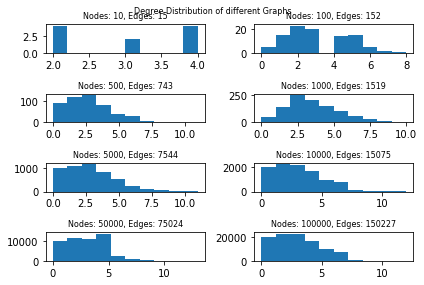

In [195]:
fig , axs = plt.subplots(4,2)
k_list = [10,100,500,1000,5000,10000,50000,100000,500000,10000000]
x_lims = [20,20,30,50,100,200,300,400]
k = 0
for i in range(0,4):
    for j in range(0,2):  
        G_ = final_graphs["greater_3"][k_list[k]]
        degrees = [val for (node, val) in G_.degree()]
        axs[i,j].set_title(f"Nodes: {nx.number_of_nodes(G_)}, Edges: {nx.number_of_edges(G_)}",fontsize=8)
        # axs[i,j].set_xlim([0,x_lims[k]])
        axs[i,j].hist(degrees,rwidth=10)
        k+=1    
fig.suptitle('Degree Distribution of different Graphs', fontsize=8)
fig.tight_layout()
fig.show()

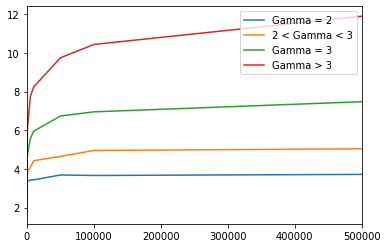

In [197]:
nodes_count = [10,100,500,1000,5000,10000,50000,100000,500000]
gammas = {
    "eq_2": "Gamma = 2",
    "btw_2_3": "2 < Gamma < 3",
    "eq_3": "Gamma = 3",
    "greater_3": "Gamma > 3"
}
axs = plt.axes()
for gamma,graphs in final_avg_d.items():
  avg_d = [avg_d for count,avg_d in graphs.items()]
  axs.plot(nodes_count,avg_d, label=str(gammas[gamma]))
  axs.legend()
  axs.set_xlim([0,500000])
  # for node_count,avg_d in graphs.items():
  




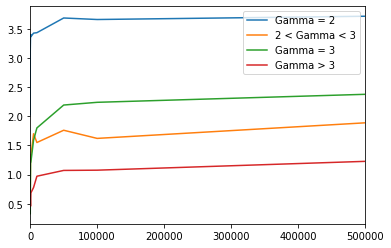

In [219]:
## Calculate Error
nodes_count = [10,100,500,1000,5000,10000,50000,100000,500000]

gamma_2_y = [ avg_d for nodes_count,avg_d in final_avg_d["eq_2"].items()] 
plt.plot(nodes_count,gamma_2_y, label="Gamma = 2")
gamma_23_y = [ avg_d for nodes_count,avg_d in final_avg_d["btw_2_3"].items()] 
gamma_23_y_error = np.absolute([gamma_23_y[i] - np.log(np.log(nodes))/np.log(1.45) for i,nodes in enumerate(nodes_count) ])
plt.plot(nodes_count,gamma_23_y_error, label="2 < Gamma < 3")
gamma_3_y = [ avg_d for nodes_count,avg_d in final_avg_d["eq_3"].items()] 
gamma_3_y_error = np.absolute([gamma_3_y[i] - np.log(nodes)/np.log(np.log(nodes)) for i,nodes in enumerate(nodes_count) ])
plt.plot(nodes_count,gamma_3_y_error, label="Gamma = 3")
gamma_g3_y = [ avg_d for nodes_count,avg_d in final_avg_d["greater_3"].items()] 
gamma_g3_y_error = np.absolute([gamma_g3_y[i] - np.log(nodes) for i,nodes in enumerate(nodes_count) ])
plt.plot(nodes_count,gamma_g3_y_error, label="Gamma > 3")
plt.legend()
plt.xlim([0,500000])
plt.show()


In [217]:
wanted = [np.log(np.log(nodes))/np.log(1.45) for nodes in nodes_count]
ff = np.absolute(np.array(wanted)-np.array(gamma_23_y))
print(wanted,"\n",gamma_23_y,"\n",gamma_23_y_error,"\n",ff)

[2.2446562124009284, 4.110143740874129, 4.916797231519394, 5.201383990593941, 5.7650617555297465, 5.975631269347329, 6.409067145331412, 6.57618411542484, 6.928337987404769] 
 [1.829, 3.355, 3.574, 3.885, 4.064, 4.425, 4.648, 4.955, 5.04] 
 [0.41565621 0.75514374 1.34279723 1.31638399 1.70106176 1.55063127
 1.76106715 1.62118412 1.88833799] 
 [0.41565621 0.75514374 1.34279723 1.31638399 1.70106176 1.55063127
 1.76106715 1.62118412 1.88833799]
